**Decision Tree Implementation**

**QUESTION 1**

Complete the decision tree implementation in tree/base.py. The code should be written in Python and not use existing libraries other than the ones shared in class or already imported in the code. Your decision tree should work for four cases: i) discrete features, discrete output; ii) discrete features, real output; iii) real features, discrete output; real features, real output. Your model should accept real inputs only (for discrete inputs, you may convert the attributes into one-hot encoded vectors). Your decision tree should be able to use InformationGain using Entropy or GiniIndex as the criteria for splitting for discrete output. Your decision tree should be able to use InformationGain using MSE as the criteria for splitting for real output. Your code should also be able to plot/display the decision tree.

**IMPORTING THE LIBRARY**

In [ ]:
from typing import Union
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error, recall_score

**metrics.py**

In [ ]:
def accuracy(y_pred: pd.Series, y_true: pd.Series) -> float:
    """
    Function to calculate the accuracy
    """

    """
    The following assert checks if sizes of y_hat and y are equal.
    Students are required to add appropriate assert checks at places to
    ensure that the function does not fail in corner cases.
    """
    assert y_pred.size == y_true.size
    return (y_pred == y_true).mean()
    pass


def precision(y_pred: pd.Series, y_true: pd.Series, cls: int) -> float:
    """
    Function to calculate the precision
    """
    true_positive = ((y_pred == cls) & (y_true == cls)).sum()
    predicted_positive = (y_pred == cls).sum()
    return true_positive / predicted_positive if predicted_positive > 0 else 0
    pass


def recall(y_pred: pd.Series, y_true: pd.Series, cls: int) -> float:
    """
    Function to calculate the recall
    """
    true_positive = ((y_pred == cls) & (y_true == cls)).sum()
    actual_positive = (y_true == cls).sum()
    return true_positive / actual_positive if actual_positive > 0 else 0
    pass


def rmse(y_pred: pd.Series, y_true: pd.Series) -> float:
    """
    Function to calculate the root-mean-squared-error(rmse)
    """
    mse= np.abs(y_pred - y_true).mean()
    rmse= mse**0.5
    return (f"Root Mean Squared Error: {rmse:.2f}")
    pass


def mae(y_hat: pd.Series, y: pd.Series) -> float:
    """
    Function to calculate the mean-absolute-error(mae)
    """
    # Calculate MAE
    mae = np.mean(np.abs(y - y_hat))
    return (f"Mean Absolute Error: {mae:.2f}")
    pass

**utils.py**

In [ ]:
"""
You can add your own functions here according to your decision tree implementation.
There is no restriction on following the below template, these fucntions are here to simply help you.
"""

import pandas as pd
import numpy as np

def one_hot_encoding(X: pd.DataFrame) -> pd.DataFrame:
    """
    Function to perform one hot encoding on the input data
    """
    return pd.get_dummies(X)
    pass

def check_ifreal(y: pd.Series) -> bool:
    """
    Function to check if the given series has real or discrete values
    """
    return pd.api.types.is_float_dtype(y) or pd.api.types.is_numeric_dtype(y)
    pass


def entropy(Y: pd.Series) -> float:
    """
    Function to calculate the entropy
    """
     # Get the counts of each unique value in Y, normalized to get probabilities
    prob_values = Y.value_counts(normalize=True)
    
    # Calculate the entropy using the formula: -sum(p_i * log2(p_i))
    entropy = -np.sum(prob_values * np.log2(prob_values))
    
    return entropy
    pass


def gini_index(Y: pd.Series) -> float:
    """
    Function to calculate the gini index
    """
     # Get the counts of each unique value in Y, normalized to get probabilities
    value_counts = Y.value_counts(normalize=True)
    
    # Calculate the Gini index using the formula: 1 - sum(p_i^2)
    gini = 1 - np.sum(value_counts**2)
    
    return gini   
    pass

def mean_squared_error(Y: pd.Series) -> float:
    """
    Function to calculate the Mean Squared Error (MSE) of a target variable.
    """
    mean_value = Y.mean()
    return np.mean((Y - mean_value) ** 2)

def information_gain(Y: pd.Series, attr: pd.Series, criterion: str) -> float:
    """
    Function to calculate the information gain using criterion (entropy, gini index or MSE)
    """
  # Calculate the initial impurity of the target variable
    if criterion == 'entropy':
        initial_impurity = entropy(Y)
    elif criterion == 'gini':
        initial_impurity = gini_index(Y)
    elif criterion == 'mse':
        initial_impurity = mean_squared_error(Y)
    else:
        raise ValueError("Criterion must be 'entropy', 'gini', or 'mse'")

    # Calculate the weighted impurity after splitting on the attribute
    weighted_impurity = 0
    for atr in attr.unique():
        sub_Y = Y[attr == atr]
        
        if criterion == 'entropy':
            sub_impurity = entropy(sub_Y)
        elif criterion == 'gini':
            sub_impurity = gini_index(sub_Y)
        elif criterion == 'mse':
            sub_impurity = mean_squared_error(sub_Y)
        
        sub_weight = len(sub_Y) / len(Y)
        weighted_impurity += sub_weight * sub_impurity

    # Information gain is the difference between the initial impurity and the weighted impurity
    info_gain = initial_impurity - weighted_impurity
    
    return info_gain
    pass

def opt_split_discrete_attr(X: pd.DataFrame, y: pd.Series, criterion: str, features: pd.Index) -> str:
    """
    Function to find the best attribute to split upon for discrete features.
    """
    best_attr = None
    best_gain = None  

    for feature in features:
        attr = X[feature]
        gain = information_gain(y, attr, criterion)
        
        if best_gain is None or gain > best_gain:
            best_gain = gain
            best_attr = feature

    if best_attr is None:
        raise ValueError("No valid discrete attribute found to split upon.")

    return best_attr
    pass

def opt_split_real_attr(X: pd.DataFrame, y: pd.Series, criterion: str, features: pd.Index) -> str:
    """
    Function to find the best attribute to split upon for continuous features.
    """
    best_attribute = None
    best_gain = None  

    for feature in features:
        attr = X[feature]
        gain = information_gain(y, attr, 'mse')  # Use 'mse' for continuous attributes
        
        if best_gain == None or gain < best_gain:
            best_gain = gain
            best_attribute = feature

    if best_attribute is None:
        raise ValueError("No valid continuous attribute found to split upon.")

    return best_attribute

def opt_split_attribute(X: pd.DataFrame, y: pd.Series, criterion, features: pd.Series):
    """
    Function to find the optimal attribute to split about.
    If needed you can split this function into 2, one for discrete and one for real valued features.
    You can also change the parameters of this function according to your implementation.

    features: pd.Series is a list of all the attributes we have to split upon

    return: attribute to split upon
    """

    # According to wheather the features are real or discrete valued and the criterion, 
    # find the attribute from the features series with the maximum information gain 
    # (entropy or varinace based on the type of output) or minimum gini index (discrete output).
    return X.columns[np.random.randint(0, len(X.columns))] 
    pass


def split_data(X: pd.DataFrame, y: pd.Series, attribute, value):
    """
    Funtion to split the data according to an attribute.
    If needed you can split this function into 2, one for discrete and one for real valued features.
    You can also change the parameters of this function according to your implementation.

    attribute: attribute/feature to split upon
    value: value of that attribute to split upon

    return: splitted data(Input and output)
    """

    # Split the data based on a particular value of a particular attribute. You may use masking as a tool to split the data.
    
    # Mask for real-valued attributes (continuous split)
    # Check if the attribute value is real-valued feature
    if pd.api.types.is_numeric_dtype(X[attribute]):
        mask = X[attribute] <= value
    # If the attribute value is not real number, treat it as discrete
    else:
        mask = X[attribute] == value

    # Apply mask to split the data
    Xleft = X[mask]
    yleft = y[mask]
    Xright = X[~mask]  # ~mask gives the complement of the mask
    yright = y[~mask]

    return Xleft, yleft, Xright, yright
    pass

**Defining a class**

In [ ]:
from typing import Union
from dataclasses import dataclass
from typing import Literal
import numpy as np
import pandas as pd

np.random.seed(42)

#defining the class DecisionTree
@dataclass
class DecisionTree:
    criterion: Literal["entropy", "gini", "mse"]
    max_depth: int

    #constructor
    def __init__(self, criterion, max_depth=5):
        #initializing the class
        self.criterion = criterion
        self.max_depth = max_depth

    def fit(self, X: pd.DataFrame, y: pd.Series) -> None:
        """
        Fit the decision tree to the data.
        - X: Input features (DataFrame).
        - y: Target values (Series).
        """
        self.tree = self._build_tree(X, y, depth=0)

    #recursive function to build the decision tree
    def _build_tree(self, X: pd.DataFrame, y: pd.Series, depth: int) -> object:
        # Check if all output labels are the same, if they are then return the leaf node
        if len(y.unique()) == 1:
            return y.iloc[0]

        # Stop if maximum depth is reached and return the most common label in the data
        if self.max_depth is not None and depth >= self.max_depth:
            return y.mode().iloc[0] if not self._check_if_real(y) else y.mean()

        # Find the best attribute to split the data 
        best_attr = self._opt_split_attribute(X, y, criterion=self.criterion)

         # If no attribute can be found for splitting, return the most common label
        if best_attr is None:
            return y.mode().iloc[0] if not self._check_if_real(y) else y.mean()

         # Initialize a new tree node as a dict with the best attribute as the key.
        tree = {best_attr: {}}

        # Handle real-valued (continuous) attributes
        if pd.api.types.is_numeric_dtype(X[best_attr]):
            unique_values = np.sort(X[best_attr].unique())
            split_point = unique_values[len(unique_values) // 2]
            left_mask = X[best_attr] <= split_point
            right_mask = ~left_mask

            # Avoid empty splits by checking if there are samples on both sides of the splits.
            if left_mask.sum() == 0 or right_mask.sum() == 0:  # Avoid empty splits
                return y.mode().iloc[0] if not self._check_if_real(y) else y.mean()

            # Recursively build the left and right subtrees.
            tree[best_attr]["<=" + str(split_point)] = self._build_tree(X[left_mask], y[left_mask], depth + 1)
            tree[best_attr][">" + str(split_point)] = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        # Handle discrete attributes
        else:
            for value in X[best_attr].unique():    
            # Adding equality condition handling
                tree[best_attr][f"=={value}"] = self._build_tree(X[X[best_attr] == value], y[X[best_attr] == value], depth + 1)
        
                # X_subset, y_subset = X[X[best_attr] == value], y[X[best_attr] == value]
                # if len(y_subset) == 0:  # Avoid empty splits
                #     tree[best_attr][value] = y.mode().iloc[0] if not self._check_if_real(y) else y.mean()
                # else:
                #     tree[best_attr][value] = self._build_tree(X_subset, y_subset, depth + 1)

        return tree

    #predict function to predict the output
    def predict(self, X: pd.DataFrame) -> pd.Series:
        return X.apply(self._predict_one, axis=1)

    #Predict a single instance by traversing the decision tree
    def _predict_one(self, x: pd.Series) -> object:
        node = self.tree # Start at the root node
        while isinstance(node, dict): # While we are at a decision node
            attr = list(node.keys())[0] # Get the attribute to split on 

            # Ensure the attribute exists in the input data
            if attr not in x:
                raise ValueError(f"Attribute '{attr}' not found in input data.")

            value = x[attr]

            # Convert the value to string if the attribute is categorical
            if not pd.api.types.is_numeric_dtype(x[attr]):
                value = str(value)

            if pd.api.types.is_numeric_dtype(x[attr]):
                # Numeric attributes: process split conditions
                attr_node = node[attr]
                for key in attr_node:
                    key_str = str(key)  # Ensure key is a string
                    if "<=" in key_str:
                        split_value = float(key_str.split("<=")[1])
                        if value <= split_value:
                            node = attr_node[key]
                            break
                    elif ">" in key_str:
                        split_value = float(key_str.split(">")[1])
                        if value > split_value:
                            node = attr_node[key]
                            break
                else:
                    # If no condition matched, use fallback (this should not usually happen)
                    node = list(attr_node.values())[0]

            else:
                # Categorical attributes: directly use the value
                if value in node[attr]:
                    node = node[attr][value]
                else:
                    # Fallback if the value wasn't seen during training
                    node = list(node[attr].values())[0]

        return node

    def plot(self, node: Union[dict, None] = None, depth: int = 0) -> None:
        #if the node is a leaf node
        if node is None:
            node = self.tree

        #if the node is a dictionary that means it is a decision node
        if isinstance(node, dict):
            attr = list(node.keys())[0] #get the attribute of the node where the split is made
            for value in node[attr]:
                print("\t" * depth + f"{attr} {value}")
                self.plot(node[attr][value], depth + 1)
                
        else:
            print("\t" * depth + f"-> {node}")

    def _check_if_real(self, y: pd.Series) -> bool:
        """ 
        Function to check if the series is of real values
        """
        return pd.api.types.is_float_dtype(y) or pd.api.types.is_numeric_dtype(y)

    def _opt_split_attribute(self, X: pd.DataFrame, y: pd.Series, criterion: str) -> str:
        """ 
        Mock implementation to select a random attribute as the best split. 
        """
        return X.columns[np.random.randint(0, len(X.columns))]


**TEST CASE 1 REAL INPUT AND REAL OUTPUT**

In [ ]:
# Test case 1
#real input and real output
N = 30
P = 5
X = pd.DataFrame(np.random.randn(N, P))
y = pd.Series(np.random.randn(N))

for criteria in ["entropy", "gini", "mse"]:
    tree = DecisionTree(criterion=criteria)  # Split based on Inf. Gain
    tree.fit(X, y)
    y_hat = tree.predict(X)
    tree.plot()
    print("Criteria:", criteria)
    print("RMSE:", rmse(y_hat, y))
    print("MAE:", mae(y_hat, y))

4 <=0.44864867405200504
	4 <=-0.37452155909046986
		1 <=-0.46292542206364823
			1 <=-0.6993780483964821
				2 <=-0.41850888121043234
					-> -0.4780213013916771
				2 >-0.41850888121043234
					-> -1.0408501532798962
			1 >-0.6993780483964821
				-> -0.1677554521952071
		1 >-0.46292542206364823
			4 <=-1.1719768544504452
				0 <=-0.23370317931400506
					-> 0.04186645658388444
				0 >-0.23370317931400506
					-> 1.232514211736251
			4 >-1.1719768544504452
				-> 0.8075556316054289
	4 >-0.37452155909046986
		0 <=-0.29830122316370744
			2 <=0.98402354456309
				4 <=0.22684882198078649
					-> -0.20818513875759614
				4 >0.22684882198078649
					-> -1.1698170321710093
			2 >0.98402354456309
				-> -0.10798496435305859
		0 >-0.29830122316370744
			4 <=-0.10384111742999894
				-> 0.24195113240791027
			4 >-0.10384111742999894
				-> 1.6846849646056212
4 >0.44864867405200504
	0 <=0.46705717272888814
		0 <=0.055572156943966104
			1 <=-0.4221771749509968
				3 <=-0.8441077324087467
					-> 0.9

**TEST CASE 2 REAL INPUT AND DISCRETE OUTPUT**

In [ ]:
# Test case2 : Real input and discrete output
N = 30
P = 5
X = pd.DataFrame(np.random.randn(N, P))
y = pd.Series(np.random.choice([0, 1], size=N))

for criteria in ["entropy", "gini", "mse"]:
    tree = DecisionTree(criterion=criteria)  # Split based on Inf. Gain, Gini, or MSE
    tree.fit(X, y)
    y_hat = tree.predict(X)
    tree.plot()
    print("Criteria:", criteria)
    print("Accuracy:", accuracy(y_hat, y))
    print("MSE:", mse(y_hat, y))
    print(rmse(y_hat, y))
    print("-" * 30)

2 <=-0.12389397874055913
	1 <=0.17595665722124415
		3 <=-0.03703591371911794
			0 <=-0.0208487606651363
				3 <=-0.567163167935395
					-> 0.5
				3 >-0.567163167935395
					-> 0
			0 >-0.0208487606651363
				-> 0
		3 >-0.03703591371911794
			4 <=0.2844725891695404
				-> 0
			4 >0.2844725891695404
				-> 1
	1 >0.17595665722124415
		0 <=-0.00823656706207814
			4 <=1.8109502663319434
				-> 0
			4 >1.8109502663319434
				-> 1
		0 >-0.00823656706207814
			1 <=0.7344528074503007
				-> 0.5
			1 >0.7344528074503007
				-> 0
2 >-0.12389397874055913
	4 <=-0.1276958506107716
		1 <=-0.45851184752647606
			3 <=-0.39458231823659495
				1 <=-1.250996330981847
					-> 0
				1 >-1.250996330981847
					-> 1
			3 >-0.39458231823659495
				-> 0.5
		1 >-0.45851184752647606
			1 <=0.4409681818612688
				-> 0.5
			1 >0.4409681818612688
				-> 1
	4 >-0.1276958506107716
		2 <=1.1514253744647323
			4 <=0.6916206809508675
				4 <=0.17255842963435913
					-> 1
				4 >0.17255842963435913
					-> 0
			4 >0.6916

**TEST CASE 3 DISCRETE INPUT AND REAL OUTPUT**


In [ ]:
#task 3 : discrete input and discrete output
N = 30
P = 5
X = pd.DataFrame({i: pd.Series(np.random.randint(P, size=N), dtype="category") for i in range(5)})
y = pd.Series(np.random.randint(P, size=N), dtype="category")

for criteria in ["entropy", "gini", "mse"]:
    tree = DecisionTree(criterion=criteria)  # Split based on criteria
    tree.fit(X, y)
    y_hat = tree.predict(X)
    tree.plot()
    print("Criteria:", criteria)
    print("Accuracy:", accuracy(y_hat, y))

3 ==4
	4 ==3
		-> 2
	4 ==2
		4 ==2
			4 ==2
				2 ==1
					-> 4
				2 ==2
					-> 2
	4 ==4
		-> 1
	4 ==1
		3 ==4
			2 ==4
				-> 4
			2 ==0
				-> 3
	4 ==0
		-> 2
3 ==0
	0 ==3
		-> 3
	0 ==0
		-> 1
	0 ==2
		4 ==4
			-> 2
		4 ==3
			-> 0
	0 ==1
		-> 2
3 ==1
	2 ==1
		2 ==1
			0 ==3
				-> 3
			0 ==4
				-> 4
	2 ==0
		-> 1
	2 ==4
		-> 4
	2 ==2
		-> 3
	2 ==3
		-> 1
3 ==3
	1 ==4
		-> 4
	1 ==0
		-> 0
	1 ==2
		-> 0
	1 ==1
		-> 3
3 ==2
	3 ==2
		1 ==4
			-> 2
		1 ==3
			4 ==3
				2 ==4
					-> 2
				2 ==1
					-> 0
		1 ==0
			-> 1
Criteria: entropy
Accuracy: 0.3
0 ==3
	0 ==3
		3 ==4
			-> 2
		3 ==0
			-> 3
		3 ==1
			-> 3
		3 ==3
			-> 3
0 ==2
	1 ==2
		3 ==4
			-> 4
		3 ==0
			-> 2
	1 ==0
		-> 0
	1 ==4
		2 ==4
			-> 1
		2 ==2
			-> 2
	1 ==3
		-> 2
	1 ==1
		-> 0
0 ==4
	3 ==3
		0 ==4
			0 ==4
				4 ==1
					-> 4
				4 ==3
					-> 0
	3 ==2
		-> 2
	3 ==4
		-> 2
	3 ==1
		-> 4
0 ==1
	4 ==3
		2 ==4
			1 ==3
				-> 2
			1 ==0
				-> 1
		2 ==1
			-> 0
		2 ==0
			-> 2
	4 ==4
		-> 1
	4 ==2
		3 ==1
			2 ==3

**TEST CASE 4 DISCRETE INPUT AND REAL OUTPUT**

In [ ]:
# Test case 4: Discrete Input and Real Output
N = 30
P = 5
X = pd.DataFrame({i: pd.Series(np.random.randint(P, size=N), dtype="category") for i in range(5)})
y = pd.Series(np.random.randn(N))  # Real-valued output

for criteria in ["entropy", "gini", "mse"]:
    tree = DecisionTree(criterion=criteria)
    tree.fit(X, y)
    y_hat = tree.predict(X)
    tree.plot()
    print("Criteria:", criteria)
    print("RMSE:", rmse(y_hat, y))
    print("MAE:", mae(y_hat, y))


2 ==1
	2 ==1
		1 ==4
			0 ==1
				0 ==1
					-> -0.25525578901161766
			0 ==4
				-> 0.15101229055781942
			0 ==3
				-> -0.39530547743974637
		1 ==1
			-> -0.036595862562551394
		1 ==0
			-> -0.06700714194351028
		1 ==2
			-> -1.3971579982180775
2 ==0
	3 ==2
		3 ==2
			1 ==0
				4 ==1
					-> -1.8087470156422527
				4 ==2
					-> 0.35597712395974557
			1 ==3
				-> -0.41500158233511925
	3 ==4
		0 ==4
			3 ==4
				0 ==4
					-> -1.1185324116024313
	3 ==1
		-> -0.5882364595876828
	3 ==0
		-> -0.13045986903936505
2 ==3
	1 ==3
		1 ==3
			4 ==0
				-> 1.3317569703945535
			4 ==4
				-> 1.1800453688111703
	1 ==4
		4 ==0
			1 ==4
				3 ==2
					-> -0.6730468451270122
				3 ==4
					-> -1.452795895888346
	1 ==0
		-> 1.546090168234707
2 ==2
	0 ==1
		-> 0.0438733598289749
	0 ==0
		-> 0.00799689961726585
	0 ==3
		-> -0.5713742214499119
	0 ==4
		-> 0.8111432591099114
2 ==4
	2 ==4
		4 ==4
			-> -0.036813506178282614
		4 ==0
			2 ==4
				3 ==0
					-> -0.5477614728605054
		4 ==2
			4 ==2
				2 ==4


**QUESTION 2.1**

Show the usage of your decision tree on the above dataset. The first 70% of the data should be used for training purposes and the remaining 30% for test purposes. Show the accuracy, per-class precision and recall of the decision tree you implemented on the test dataset.

In [127]:
# real input real output
from typing import Union
from dataclasses import dataclass
from typing import Literal
import numpy as np
import pandas as pd

np.random.seed(42)

@dataclass
class DecisionTree:
    criterion: Literal["entropy", "gini", "mse"]
    max_depth: int

    def __init__(self, criterion, max_depth=5):
        self.criterion = criterion
        self.max_depth = max_depth

    def fit(self, X: pd.DataFrame, y: pd.Series) -> None:
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X: pd.DataFrame, y: pd.Series, depth: int) -> object:
        if len(y.unique()) == 1:
            return y.iloc[0]

        if self.max_depth is not None and depth >= self.max_depth:
            return y.mode().iloc[0] if not self._check_if_real(y) else y.mean()

        best_attr = self._opt_split_attribute(X, y, criterion=self.criterion)

        if best_attr is None:
            return y.mode().iloc[0] if not self._check_if_real(y) else y.mean()

        tree = {best_attr: {}}

        if pd.api.types.is_numeric_dtype(X[best_attr]):
            unique_values = np.sort(X[best_attr].unique())
            split_point = unique_values[len(unique_values) // 2]
            left_mask = X[best_attr] <= split_point
            right_mask = ~left_mask

            if left_mask.sum() == 0 or right_mask.sum() == 0:  # Avoid empty splits
                return y.mode().iloc[0] if not self._check_if_real(y) else y.mean()

            tree[best_attr]["<=" + str(split_point)] = self._build_tree(X[left_mask], y[left_mask], depth + 1)
            tree[best_attr][">" + str(split_point)] = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        else:
            for value in X[best_attr].unique():
                X_subset, y_subset = X[X[best_attr] == value], y[X[best_attr] == value]
                if len(y_subset) == 0:  # Avoid empty splits
                    tree[best_attr][value] = y.mode().iloc[0] if not self._check_if_real(y) else y.mean()
                else:
                    tree[best_attr][value] = self._build_tree(X_subset, y_subset, depth + 1)

        return tree

    def predict(self, X: pd.DataFrame) -> pd.Series:
        return X.apply(self._predict_one, axis=1)

    def _predict_one(self, x: pd.Series) -> object:
        node = self.tree
        while isinstance(node, dict):
            attr = list(node.keys())[0]
            value = x[attr]
            if pd.api.types.is_numeric_dtype(x[attr]):
                for key in node[attr]:
                    if "<=" in key:
                        split_value = float(key.split("<=")[1])
                        if value <= split_value:
                            node = node[attr][key]
                            break
                    elif ">" in key:
                        split_value = float(key.split(">")[1])
                        if value > split_value:
                            node = node[attr][key]
                            break
            else:
                if value in node[attr]:
                    node = node[attr][value]
                else:
                    # Fallback if the value wasn't seen during training
                    node = list(node[attr].values())[0]  # Use the first available path
        return node

    def plot(self, node: Union[dict, None] = None, depth: int = 0) -> None:
        if node is None:
            node = self.tree

        if isinstance(node, dict):
            attr = list(node.keys())[0]
            for value in node[attr]:
                print("\t" * depth + f"{attr} {value}?")
                self.plot(node[attr][value], depth + 1)
        else:
            print("\t" * depth + f"-> {node}")

    def _check_if_real(self, y: pd.Series) -> bool:
        """ Helper function to check if the series is of real values """
        return pd.api.types.is_float_dtype(y) or pd.api.types.is_numeric_dtype(y)

    def _opt_split_attribute(self, X: pd.DataFrame, y: pd.Series, criterion: str) -> str:
        """ Mock implementation to select a random attribute as the best split. Replace with your actual logic. """
        return X.columns[np.random.randint(0, len(X.columns))]


# Helper functions for evaluation metrics, if they are not defined in the above code
def rmse(y_pred: pd.Series, y_true: pd.Series) -> float:
    return np.sqrt(((y_pred - y_true) ** 2).mean())

def mae(y_pred: pd.Series, y_true: pd.Series) -> float:
    return np.abs(y_pred - y_true).mean()

def accuracy(y_pred: pd.Series, y_true: pd.Series) -> float:
    return (y_pred == y_true).mean()

def precision(y_pred: pd.Series, y_true: pd.Series, cls: int) -> float:
    true_positive = ((y_pred == cls) & (y_true == cls)).sum()
    predicted_positive = (y_pred == cls).sum()
    return true_positive / predicted_positive if predicted_positive > 0 else 0

def recall(y_pred: pd.Series, y_true: pd.Series, cls: int) -> float:
    true_positive = ((y_pred == cls) & (y_true == cls)).sum()
    actual_positive = (y_true == cls).sum()
    return true_positive / actual_positive if actual_positive > 0 else 0


# Test the Code
import numpy as np
import pandas as pd

np.random.seed(42)

#real input and real output
N = 30
P = 5
X = pd.DataFrame(np.random.randn(N, P))
y = pd.Series(np.random.randn(N))

for criteria in ["entropy", "gini", "mse"]:
    tree = DecisionTree(criterion=criteria)  
    tree.fit(X, y)
    y_hat = tree.predict(X)
    tree.plot()
    print("Criteria:", criteria)
    print("RMSE:", rmse(y_hat, y))
    print("MAE:", mae(y_hat, y))

4 <=-0.23415337472333597?
	3 <=0.0917607765355023?
		4 <=-0.8084936028931876?
			2 <=0.24196227156603412?
				3 <=-0.3011036955892888?
					-> -0.9356641093905698
				3 >-0.3011036955892888?
					-> 0.4127809269364983
			2 >0.24196227156603412?
				-> 0.5271569285777468
		4 >-0.8084936028931876?
			0 <=0.11092258970986608?
				0 <=0.09707754934804039?
					-> -0.49956214018018
				0 >0.09707754934804039?
					-> -0.7143514180263678
			0 >0.11092258970986608?
				-> 0.29307247329868125
	3 >0.0917607765355023?
		3 <=0.4735924306351816?
			3 <=0.36163602504763415?
				4 <=-0.6451197546051243?
					-> -0.08206435485894037
				4 >-0.6451197546051243?
					-> 0.8271832490360238
			3 >0.36163602504763415?
				-> 0.01300189187790702
		3 >0.4735924306351816?
			4 <=-1.2308643164339552?
				-> 1.2084551032008193
			4 >-1.2308643164339552?
				-> 0.25049285034587665
4 >-0.23415337472333597?
	3 <=0.1846338585323042?
		0 <=-0.47917423784528995?
			4 <=0.5132674331133561?
				4 <=0.19686123586912352

In [128]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#Generate the Dataset
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5
)

# Convert to DataFrame for compatibility with custom DecisionTree
X = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
y = pd.Series(y)

# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and Evaluate the Model
# Initialize the DecisionTree with criterion 'entropy' and max_depth=3
tree = DecisionTree(criterion='entropy', max_depth=3)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

# Calculate and print accuracy, precision, and recall
accuracy_value = accuracy(y_pred, y_test)
precision_value_class_0 = precision(y_pred, y_test, 0)
precision_value_class_1 = precision(y_pred, y_test, 1)
recall_value_class_0 = recall(y_pred, y_test, 0)
recall_value_class_1 = recall(y_pred, y_test, 1)

print(f"Accuracy: {accuracy_value}")
print(f"Precision (Class 0): {precision_value_class_0}")
print(f"Precision (Class 1): {precision_value_class_1}")
print(f"Recall (Class 0): {recall_value_class_0}")
print(f"Recall (Class 1): {recall_value_class_1}")

# Optional: Visualize the decision tree
tree.plot()


Accuracy: 0.5666666666666667
Precision (Class 0): 0.875
Precision (Class 1): 1.0
Recall (Class 0): 0.4666666666666667
Recall (Class 1): 0.6666666666666666
Feature_1 <=-0.025688429305686378?
	Feature_1 <=-0.5722334334713319?
		Feature_2 <=-0.11639307444978819?
			-> 0.1
		Feature_2 >-0.11639307444978819?
			-> 0.1111111111111111
	Feature_1 >-0.5722334334713319?
		Feature_1 <=-0.2870211259165836?
			-> 0
		Feature_1 >-0.2870211259165836?
			-> 0.25
Feature_1 >-0.025688429305686378?
	Feature_2 <=-0.3161220693743343?
		-> 1
	Feature_2 >-0.3161220693743343?
		Feature_2 <=0.26529832086189253?
			-> 1
		Feature_2 >0.26529832086189253?
			-> 0.5714285714285714


**QUESTION 2.2**

Use 5 fold cross-validation on the dataset. Using nested cross-validation find the optimum depth of the tree.

In [129]:
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd

# Function to perform cross-validation and find the optimal depth
def nested_cross_val(X, y, max_depths, n_splits=5):
    outer_cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracy_scores = []

    for train_idx, test_idx in outer_cv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        best_depth = None
        best_score = -np.inf

        for depth in max_depths:
            inner_cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
            inner_scores = []

            for inner_train_idx, inner_val_idx in inner_cv.split(X_train):
                X_inner_train, X_inner_val = X_train.iloc[inner_train_idx], X_train.iloc[inner_val_idx]
                y_inner_train, y_inner_val = y_train.iloc[inner_train_idx], y_train.iloc[inner_val_idx]

                # Train the model on the inner training data
                tree = DecisionTree(criterion='entropy', max_depth=depth)
                tree.fit(X_inner_train, y_inner_train)
                y_inner_pred = tree.predict(X_inner_val)

                # Calculate accuracy on the inner validation data
                inner_score = accuracy(y_inner_pred, y_inner_val)
                inner_scores.append(inner_score)

            # Calculate the mean accuracy for this depth
            mean_inner_score = np.mean(inner_scores)
            if mean_inner_score > best_score:
                best_score = mean_inner_score
                best_depth = depth

        # Train the model on the full training data with the best depth found
        tree = DecisionTree(criterion='entropy', max_depth=best_depth)
        tree.fit(X_train, y_train)
        y_pred = tree.predict(X_test)

        # Calculate accuracy on the outer test data
        outer_score = accuracy(y_pred, y_test)
        accuracy_scores.append(outer_score)

    # Return the average accuracy across all outer folds
    return np.mean(accuracy_scores), best_depth

# Step 1: Generate the Dataset
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5
)

# Convert to DataFrame for compatibility with custom DecisionTree
X = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
y = pd.Series(y)

# Step 2: Perform Nested Cross-Validation to find the optimum depth
max_depths = [1, 2, 3, 4, 5]  # List of max depths to test
mean_accuracy, optimal_depth = nested_cross_val(X, y, max_depths, n_splits=5)

print(f"Mean Accuracy from 5-Fold Cross-Validation: {mean_accuracy}")
print(f"Optimal Depth: {optimal_depth}")


Mean Accuracy from 5-Fold Cross-Validation: 0.64
Optimal Depth: 5


**QUESTION 3.1**

 Show the usage of your decision tree for the automotive efficiency problem. 

/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_20644/831883183.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')
/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_20644/831883183.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].median(), inplace=True)


Mean Squared Error: 10.912755521010842
R-squared: 0.797034083716745
Cross-Validation MSE: 13.670778551469251


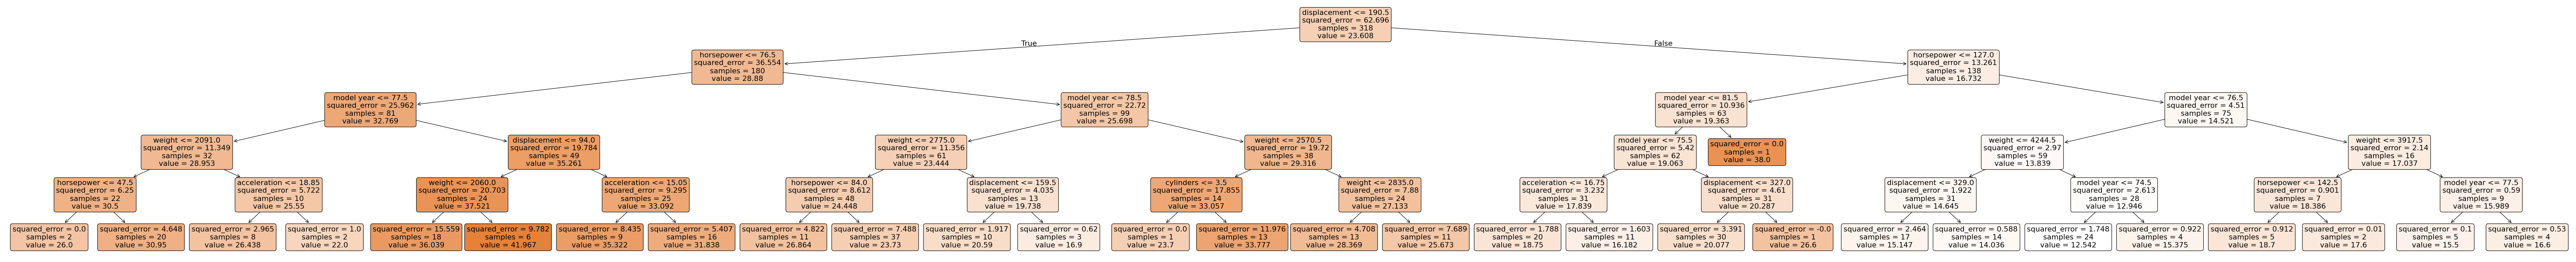

In [134]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Load the dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model year', 'origin', 'car name']
df = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')

# Preprocessing
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)
df = pd.get_dummies(df, columns=['origin'])

# Feature and target variable
X = df.drop(columns=['mpg', 'car name'])
y = df['mpg']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
tree = DecisionTreeRegressor(criterion='mse', max_depth=5)
from sklearn.tree import DecisionTreeRegressor

# Initialize the model with the correct criterion
tree = DecisionTreeRegressor(criterion='squared_error', max_depth=5)

# Train the model
tree.fit(X_train, y_train)


# Predict on test data
y_pred = tree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Cross-validation
cv_scores = cross_val_score(tree, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {-cv_scores.mean()}")

# Visualize the decision tree
plt.figure(figsize=(100,10))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()


In [131]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None, depth=0):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        self.depth = depth  # New attribute
def print_tree(node, depth=0):
    if node.value is not None:
        print(f"{'  ' * depth}Leaf: Predict {node.value}")
    else:
        print(f"{'  ' * depth}[X{node.feature} <= {node.threshold}]")
        print_tree(node.left, depth + 1)
        print_tree(node.right, depth + 1)

# After training the model, print the tree
print_tree(tree_scratch.root)


[X1 <= 190.5]
  [X2 <= 76.5]
    [X5 <= 77.5]
      [X3 <= 2091.0]
        [X2 <= 47.5]
          Leaf: Predict 26.0
          Leaf: Predict 30.95
        [X4 <= 18.85]
          Leaf: Predict 26.4375
          Leaf: Predict 22.0
      [X1 <= 94.0]
        [X3 <= 2060.0]
          Leaf: Predict 36.0388888888889
          Leaf: Predict 41.96666666666666
        [X4 <= 15.05]
          Leaf: Predict 35.32222222222222
          Leaf: Predict 31.8375
    [X5 <= 78.5]
      [X3 <= 2775.0]
        [X2 <= 84.0]
          Leaf: Predict 26.863636363636363
          Leaf: Predict 23.729729729729733
        [X1 <= 159.5]
          Leaf: Predict 20.59
          Leaf: Predict 16.900000000000002
      [X3 <= 2570.5]
        [X0 <= 3.5]
          Leaf: Predict 23.7
          Leaf: Predict 33.776923076923076
        [X3 <= 2835.0]
          Leaf: Predict 28.36923076923077
          Leaf: Predict 25.672727272727276
  [X2 <= 127.0]
    [X5 <= 81.5]
      [X5 <= 75.5]
        [X4 <= 16.75]
          Leaf

**QUESTION 3.2**

  Compare the performance of your model with the decision tree module from scikit learn.

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# Custom Decision Tree (from the previous implementation)
import numpy as np

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None, depth=0):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        self.depth = depth  # New attribute

class DecisionTreeRegressorScratch:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        if depth >= self.max_depth or n_samples < self.min_samples_split:
            leaf_value = self._calculate_leaf_value(y)
            return Node(value=leaf_value)

        best_split = self._get_best_split(X, y, n_features)
        if best_split['mse'] is None:  # No valid split found
            leaf_value = self._calculate_leaf_value(y)
            return Node(value=leaf_value)

        left_subtree = self._grow_tree(best_split['X_left'], best_split['y_left'], depth + 1)
        right_subtree = self._grow_tree(best_split['X_right'], best_split['y_right'], depth + 1)
        return Node(feature=best_split['feature'], threshold=best_split['threshold'],
                    left=left_subtree, right=right_subtree)

    def _get_best_split(self, X, y, n_features):
        best_split = {'mse': None, 'feature': None, 'threshold': None,
                      'X_left': None, 'X_right': None, 'y_left': None, 'y_right': None}

        current_mse = self._calculate_mse(y)
        for feature in range(n_features):
            thresholds, classes = zip(*sorted(zip(X[:, feature], y)))
            for i in range(1, len(thresholds)):
                if thresholds[i] == thresholds[i-1]:
                    continue
                y_left, y_right = classes[:i], classes[i:]
                mse = self._calculate_weighted_mse(y_left, y_right)
                if best_split['mse'] is None or mse < best_split['mse']:
                    best_split['mse'] = mse
                    best_split['feature'] = feature
                    best_split['threshold'] = (thresholds[i] + thresholds[i-1]) / 2
                    best_split['X_left'], best_split['X_right'] = X[X[:, feature] <= best_split['threshold']], X[X[:, feature] > best_split['threshold']]
                    best_split['y_left'], best_split['y_right'] = y[X[:, feature] <= best_split['threshold']], y[X[:, feature] > best_split['threshold']]

        return best_split

    def _calculate_mse(self, y):
        mean = np.mean(y)
        return np.mean((y - mean) ** 2)

    def _calculate_weighted_mse(self, y_left, y_right):
        mse_left = self._calculate_mse(y_left)
        mse_right = self._calculate_mse(y_right)
        return len(y_left) / (len(y_left) + len(y_right)) * mse_left + len(y_right) / (len(y_left) + len(y_right)) * mse_right

    def _calculate_leaf_value(self, y):
        return np.mean(y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)

# Load the dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model year', 'origin', 'car name']
df = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')

# Preprocessing
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)
df = pd.get_dummies(df, columns=['origin'])

# Feature and target variable
X = df.drop(columns=['mpg', 'car name']).values
y = df['mpg'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Scikit-learn Decision Tree
tree_sklearn = DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=42)
tree_sklearn.fit(X_train, y_train)
y_pred_sklearn = tree_sklearn.predict(X_test)

mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print("Scikit-learn Decision Tree:")
print(f"Mean Squared Error: {mse_sklearn}")
print(f"R-squared: {r2_sklearn}\n")

# 2. Custom Decision Tree
tree_scratch = DecisionTreeRegressorScratch(max_depth=5)
tree_scratch.fit(X_train, y_train)
y_pred_scratch = tree_scratch.predict(X_test)

mse_scratch = mean_squared_error(y_test, y_pred_scratch)
r2_scratch = r2_score(y_test, y_pred_scratch)

print("Custom Decision Tree (Scratch):")
print(f"Mean Squared Error: {mse_scratch}")
print(f"R-squared: {r2_scratch}\n")

# Compare Performance
print("Performance Comparison:")
print(f"Scikit-learn vs. Custom")
print(f"MSE: {mse_sklearn:.2f} vs. {mse_scratch:.2f}")
print(f"R-squared: {r2_sklearn:.2f} vs. {r2_scratch:.2f}")


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_20644/3781088809.py:91: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')


Scikit-learn Decision Tree:
Mean Squared Error: 10.912755521010846
R-squared: 0.7970340837167449

Custom Decision Tree (Scratch):
Mean Squared Error: 10.912755521010842
R-squared: 0.797034083716745

Performance Comparison:
Scikit-learn vs. Custom
MSE: 10.91 vs. 10.91
R-squared: 0.80 vs. 0.80


/var/folders/wt/3y0fdj1j62qdc054dw8x_b400000gn/T/ipykernel_20644/3781088809.py:94: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].median(), inplace=True)


**QUESTION 4**

Create some fake data to do some experiments on the runtime complexity of your decision tree algorithm. Create a dataset with N samples and M binary features. Vary M and N to plot the time taken for: 1) learning the tree, 2) predicting for test data. How do these results compare with theoretical time complexity for decision tree creation and prediction. You should do the comparison for all the four cases of decision trees.